In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df1=pd.read_csv('matches.csv')

In [4]:
df1.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,4/18/2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,4/19/2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,4/19/2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,4/20/2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,4/20/2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           1024 non-null   object 
 2   city             1024 non-null   object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  method        

In [6]:
df1.shape

(1024, 20)

In [7]:
#to check for duplicate rows
df1.duplicated().sum()

0

In [8]:
df1.describe()

,id,result_margin,target_runs,target_overs
count,1.024000e+03,1005.000000,1021.000000,1021.000000
mean,8.687579e+05,17.215920,163.952008,19.746523
std,3.528920e+05,21.791299,32.357541,1.629700
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483138e+05,6.000000,145.000000,20.000000
50%,8.298140e+05,8.000000,165.000000,20.000000
75%,1.216503e+06,19.000000,185.000000,20.000000
max,1.370353e+06,146.000000,264.000000,20.000000


In [9]:
df1.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
df1['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023'], dtype=object)

In [11]:
#replacing the season names in proper format
#can be done in various ways 
#method-1 :df_1['season'].replace('2007/08', '2008', inplace=True)
#using apply()

season_map = {'2007/08': '2008', '2009/10': '2010', '2020/21': '2020'}
def seasons_replace(year):
    return season_map.get(year, year)

# Use the .apply method
df2=df1.copy()
df2['season'] = df2['season'].apply(seasons_replace)

In [12]:
df2['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [13]:
#droppind the 'method' column as it has less no of entities 
df1=df1.drop(['method'],axis=1)

In [14]:
#after dropping one column
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           1024 non-null   object 
 2   city             1024 non-null   object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  umpire1       

(1024, 19)

In [15]:
#removing the rows with null values
df1.isnull().sum()
df1=df1.dropna()
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1005 non-null   int64  
 1   season           1005 non-null   object 
 2   city             1005 non-null   object 
 3   date             1005 non-null   object 
 4   match_type       1005 non-null   object 
 5   player_of_match  1005 non-null   object 
 6   venue            1005 non-null   object 
 7   team1            1005 non-null   object 
 8   team2            1005 non-null   object 
 9   toss_winner      1005 non-null   object 
 10  toss_decision    1005 non-null   object 
 11  winner           1005 non-null   object 
 12  result           1005 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1005 non-null   float64
 15  target_overs     1005 non-null   float64
 16  super_over       1005 non-null   object 
 17  umpire1          10

(1005, 19)

In [16]:
df1.dtypes

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
umpire1             object
umpire2             object
dtype: object

In [17]:
df3=pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')

In [18]:
df3.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [19]:
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

(225954, 17)

In [20]:
df3.duplicated().sum()

0

In [21]:
df3.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [22]:
df3.drop(['extra_type','player_out','kind','fielders_involved'],axis=1,inplace=True)

In [23]:
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                225954 non-null  int64 
 1   innings           225954 non-null  int64 
 2   overs             225954 non-null  int64 
 3   ballnumber        225954 non-null  int64 
 4   batter            225954 non-null  object
 5   bowler            225954 non-null  object
 6   non-striker       225954 non-null  object
 7   batsman_run       225954 non-null  int64 
 8   extras_run        225954 non-null  int64 
 9   total_run         225954 non-null  int64 
 10  non_boundary      225954 non-null  int64 
 11  isWicketDelivery  225954 non-null  int64 
 12  BattingTeam       225954 non-null  object
dtypes: int64(9), object(4)
memory usage: 22.4+ MB


(225954, 13)

In [24]:
df3.dtypes

ID                   int64
innings              int64
overs                int64
ballnumber           int64
batter              object
bowler              object
non-striker         object
batsman_run          int64
extras_run           int64
total_run            int64
non_boundary         int64
isWicketDelivery     int64
BattingTeam         object
dtype: object

In [25]:
df1['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [26]:
#changing old names of teams to new name
df1['team1']=df1['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df1['team2']=df1['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df1['winner']=df1['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
df1['toss_winner']=df1['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
df1['team1']=df1['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df1['team2']=df1['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df1['winner']=df1['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df1['toss_winner']=df1['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
#for punjab kings
df1['team1']=df1['team1'].str.replace('Kings XI Punjab','Punjab Kings')
df1['team2']=df1['team2'].str.replace('Kings XI Punjab','Punjab Kings')
df1['winner']=df1['winner'].str.replace('Kings XI Punjab','Punjab Kings')
df1['toss_winner']=df1['toss_winner'].str.replace('Kings XI Punjab','Punjab Kings')
#for Rising Pune Supergiant
df1['team1']=df1['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df1['team2']=df1['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df1['winner']=df1['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df1['toss_winner']=df1['toss_winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [27]:
df1['winner'].value_counts()

winner
Mumbai Indians                 138
Chennai Super Kings            131
Kolkata Knight Riders          119
Royal Challengers Bangalore    114
Sunrisers Hyderabad            107
Delhi Capitals                 105
Punjab Kings                   104
Rajasthan Royals               101
Gujarat Titans                  23
Lucknow Super Giants            17
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

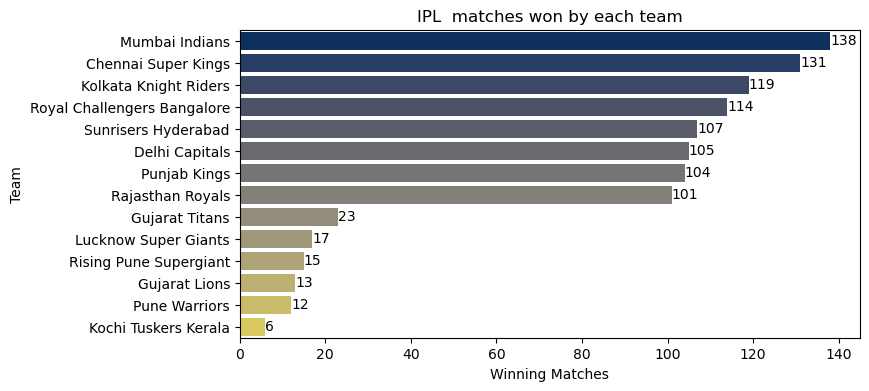

In [28]:
#visualization of winning teams 
plt.figure(figsize = (8,4))
ax=sns.countplot(y ='winner',data = df1,order=df1['winner'].value_counts().index,palette='cividis')
plt.xlabel('Winning Matches')
plt.ylabel('Team')
plt.title('IPL  matches won by each team')
abs_values = df1['winner'].value_counts()
ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_context("paper", font_scale=0.9)

Text(0.5, 1.0, 'Toss Decision')

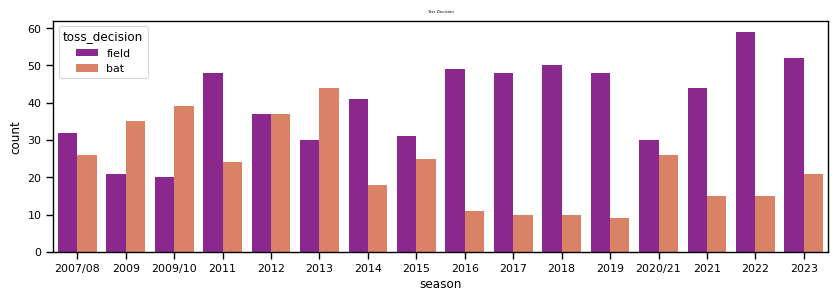

In [29]:
#Toss decision over years
plt.figure(figsize = (10,3))
sns.countplot(x='season',hue='toss_decision', data=df1,palette='plasma')
sns.set_context("paper", font_scale=0.3)
plt.title('Toss Decision')

In [30]:
Team_with_Max_runs=df1.loc[df1['result_margin'].idxmax()]
Team_with_Max_runs

id                          1082635
season                         2017
city                          Delhi
date                       5/6/2017
match_type                   League
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
team1                Delhi Capitals
team2                Mumbai Indians
toss_winner          Delhi Capitals
toss_decision                 field
winner               Mumbai Indians
result                         runs
result_margin                 146.0
target_runs                   213.0
target_overs                   20.0
super_over                        N
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 620, dtype: object

In [31]:
Team_with_Max_runs_winner=df1.loc[df1['result_margin'].idxmax()]['winner']
Team_with_Max_runs_winner

'Mumbai Indians'

In [32]:
Team_with_Min_runs=df1.loc[df1['result_margin'].idxmin()]
Team_with_Min_runs

id                           336028
season                      2007/08
city                         Mumbai
date                      5/21/2008
match_type                   League
player_of_match            SE Marsh
venue              Wankhede Stadium
team1                Mumbai Indians
team2                  Punjab Kings
toss_winner          Mumbai Indians
toss_decision                 field
winner                 Punjab Kings
result                         runs
result_margin                   1.0
target_runs                   190.0
target_overs                   20.0
super_over                        N
umpire1                   BF Bowden
umpire2              GA Pratapkumar
Name: 44, dtype: object

In [33]:
#winning Teams for each year


temp_df = df2.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

#WT=df1.drop_duplicates(subset = ['season'])
#WT[['season','winner']].reset_index(drop=True)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [34]:
#Man of the Match for each year Winning Team
MOM=df2.drop_duplicates(subset=['season'], keep='last')[['season', 'winner','player_of_match']].reset_index(drop=True)
MOM

,season,winner,player_of_match
0,2008,Rajasthan Royals,YK Pathan
1,2009,Deccan Chargers,A Kumble
2,2010,Chennai Super Kings,SK Raina
3,2011,Chennai Super Kings,M Vijay
4,2012,Kolkata Knight Riders,MS Bisla
5,2013,Mumbai Indians,KA Pollard
6,2014,Kolkata Knight Riders,MK Pandey
7,2015,Mumbai Indians,RG Sharma
8,2016,Sunrisers Hyderabad,BCJ Cutting
9,2017,Mumbai Indians,KH Pandya


In [40]:
#Highest Runs in IPL Seasons from 2008 to 2023
HR=df3.groupby(["batter"])["batsman_run"].sum().reset_index()
HR.columns = ["Batsman", "Runs"]
HR.sort_values(by = "Runs", ascending = False).head(10).reset_index(drop=True)

,Batsman,Runs
0,V Kohli,6634
1,S Dhawan,6244
2,DA Warner,5883
3,RG Sharma,5881
4,SK Raina,5536
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4978
8,RV Uthappa,4954
9,KD Karthik,4377


In [56]:
#Highest Wickets in IPL Seasons from 2008 to 2023
HR=df3.groupby(["bowler"])["isWicketDelivery"].sum().reset_index()
HR.columns = ["Bowlers", "Wickets"]
HR.sort_values(by = "Wickets", ascending = False).head(10).reset_index(drop=True)

,Bowlers,Wickets
0,DJ Bravo,207
1,SL Malinga,188
2,A Mishra,175
3,R Ashwin,174
4,YS Chahal,172
5,SP Narine,171
6,B Kumar,165
7,PP Chawla,165
8,Harbhajan Singh,161
9,JJ Bumrah,161


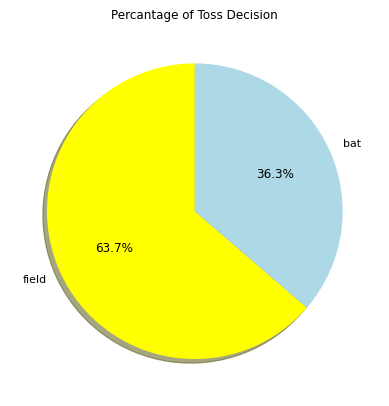

In [53]:
toss= df1.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
colors = ['yellow', 'lightblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percantage of Toss Decision")
plt.show()
sns.set_context("paper", font_scale=0.9)
          